# Part 3: Spotify Project

## Table of Contents
- Dataset Description
- Data Cleaning and Preparation
- Business Insight: Do Podcasts Need Video to Reach the Spotify Top 10?
- ML Insight: No Shortcuts to the Top — Predicting Chart Staying Power

## Dateset Description

This data set came from Kaggle and provides a daily ranking of the top 200 podcast episodes on Spotify from 22 different countries. The data set covers two months of rankings from the fall (2024-09-01 to 2024-10-23). The original CSV file included 29 columns, with details like rank, region, episode duration and whether or not an episode included explicit content or a video component.

It offers a massive repository of near real-time data that enables exploration and discovery of actionable, real-world findings and managerial insights about the world of podcasting -- where ad revenue is projected to surpass [$5 billion](https://backlinko.com/podcast-stats) in 2027.

In [20]:
# Begin with the imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Ignore all the warnings
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv('top_podcasts.csv', index_col=0)

In [9]:
# Check to make sure the dataset loaded properly with .head()
df.head()

,rank,region,chartRankMove,episodeUri,showUri,episodeName,description,show.name,show.description,show.publisher,...,show.copyrights,show.explicit,show.href,show.html_description,show.is_externally_hosted,show.languages,show.media_type,show.total_episodes,show.type,show.uri
date,,,,,,,,,,,,,,,,,,,,,
2024-09-02,1,us,UNCHANGED,37kBZRr3nqjltQXt8KuiDJ,4rOoJ6Egrf8K2IrywzwOMk,#2197 - Mike Baker,Mike Baker is a former CIA covert operations o...,The Joe Rogan Experience,The official podcast of comedian Joe Rogan.,Joe Rogan,...,[],True,https://api.spotify.com/v1/shows/4rOoJ6Egrf8K2...,<p>The official podcast of comedian Joe Rogan....,False,['en'],mixed,2366,show,spotify:show:4rOoJ6Egrf8K2IrywzwOMk
2024-09-02,2,us,UNCHANGED,293KKxbEKt2zrem6XFCxYG,4rOoJ6Egrf8K2IrywzwOMk,#2195 - Andrew Huberman,"Andrew Huberman, PhD, is a neuroscientist and ...",The Joe Rogan Experience,The official podcast of comedian Joe Rogan.,Joe Rogan,...,[],True,https://api.spotify.com/v1/shows/4rOoJ6Egrf8K2...,<p>The official podcast of comedian Joe Rogan....,False,['en'],mixed,2366,show,spotify:show:4rOoJ6Egrf8K2IrywzwOMk
2024-09-02,3,us,UNCHANGED,53z4LvgoGjjVkdiJkCGhZX,4rOoJ6Egrf8K2IrywzwOMk,#2196 - Greg Fitzsimmons,"Greg Fitzsimmons is a comedian, actor, and wri...",The Joe Rogan Experience,The official podcast of comedian Joe Rogan.,Joe Rogan,...,[],True,https://api.spotify.com/v1/shows/4rOoJ6Egrf8K2...,<p>The official podcast of comedian Joe Rogan....,False,['en'],mixed,2366,show,spotify:show:4rOoJ6Egrf8K2IrywzwOMk
2024-09-02,4,us,UP,5rrRkpfKZUUR85WxMYCX9k,0KvuZJgXfOGanBRuq6B9dm,The Worst Creature To Run Into During The Ice Age,The Ice Age was no doubt one of earth’s most q...,ExtinctZoo,"Your one stop shop for all things dinosaurs, p...",ExtinctZoo,...,[],False,https://api.spotify.com/v1/shows/0KvuZJgXfOGan...,"Your one stop shop for all things dinosaurs, p...",False,['en'],mixed,30,show,spotify:show:0KvuZJgXfOGanBRuq6B9dm
2024-09-02,5,us,DOWN,2Qd2dJDDAocbTjGvXwHOfm,5L2ON33kXa2b7laBpCAgOI,"Jeffrey Sachs: Trump’s Plan to Stop WWIII, CIA...",Professor Jeffrey Sachs’s provides a full and ...,The Tucker Carlson Show,The Tucker Carlson Show is your beacon of free...,Tucker Carlson Network,...,[],False,https://api.spotify.com/v1/shows/5L2ON33kXa2b7...,<p>The Tucker Carlson Show is your beacon of f...,False,['en'],audio,115,show,spotify:show:5L2ON33kXa2b7laBpCAgOI


### What does the Spotify data set contain?

##### To begin, let's check the 'shape' of the DataFrame can obtain both number of rows and columns.

In [12]:
# Check the number of rows and columns with .shape
df.shape

(228800, 28)

So, the dataset has 228,800 rows and 28 columns or **over 6.4 million entries.**

##### Now to check how many of those might be null:

In [15]:
# Check for null values with .isna() and .sum()
df.isna().sum()

rank                            0
region                          0
chartRankMove                   0
episodeUri                      0
showUri                         0
episodeName                     0
description                  2621
show.name                       0
show.description                0
show.publisher                  0
duration_ms                     0
explicit                        0
is_externally_hosted            0
is_playable                     0
language                        0
languages                       0
release_date                    0
release_date_precision          0
show.copyrights                 0
show.explicit                   0
show.href                       0
show.html_description          28
show.is_externally_hosted       0
show.languages                  0
show.media_type                 0
show.total_episodes             0
show.type                       0
show.uri                        0
dtype: int64

From these results, we that there are two columns with null values:
- 'description' having a null value of **2,621**
- 'show.html_description' having a null value of **28**

Now to handle the missing data...

## Data Cleaning and Preparation

In [19]:
# Replace the NaN values with 'Unknown' by using .fillna()
# Note: For now, we won't use in_place=True to make the change permanent
# instead created a placeholder DataFrame, 'df_unknown'
df_unknown = df.fillna(value='Unknown')
df_unknown.head()

,rank,region,chartRankMove,episodeUri,showUri,episodeName,description,show.name,show.description,show.publisher,...,show.copyrights,show.explicit,show.href,show.html_description,show.is_externally_hosted,show.languages,show.media_type,show.total_episodes,show.type,show.uri
date,,,,,,,,,,,,,,,,,,,,,
2024-09-02,1,us,UNCHANGED,37kBZRr3nqjltQXt8KuiDJ,4rOoJ6Egrf8K2IrywzwOMk,#2197 - Mike Baker,Mike Baker is a former CIA covert operations o...,The Joe Rogan Experience,The official podcast of comedian Joe Rogan.,Joe Rogan,...,[],True,https://api.spotify.com/v1/shows/4rOoJ6Egrf8K2...,<p>The official podcast of comedian Joe Rogan....,False,['en'],mixed,2366,show,spotify:show:4rOoJ6Egrf8K2IrywzwOMk
2024-09-02,2,us,UNCHANGED,293KKxbEKt2zrem6XFCxYG,4rOoJ6Egrf8K2IrywzwOMk,#2195 - Andrew Huberman,"Andrew Huberman, PhD, is a neuroscientist and ...",The Joe Rogan Experience,The official podcast of comedian Joe Rogan.,Joe Rogan,...,[],True,https://api.spotify.com/v1/shows/4rOoJ6Egrf8K2...,<p>The official podcast of comedian Joe Rogan....,False,['en'],mixed,2366,show,spotify:show:4rOoJ6Egrf8K2IrywzwOMk
2024-09-02,3,us,UNCHANGED,53z4LvgoGjjVkdiJkCGhZX,4rOoJ6Egrf8K2IrywzwOMk,#2196 - Greg Fitzsimmons,"Greg Fitzsimmons is a comedian, actor, and wri...",The Joe Rogan Experience,The official podcast of comedian Joe Rogan.,Joe Rogan,...,[],True,https://api.spotify.com/v1/shows/4rOoJ6Egrf8K2...,<p>The official podcast of comedian Joe Rogan....,False,['en'],mixed,2366,show,spotify:show:4rOoJ6Egrf8K2IrywzwOMk
2024-09-02,4,us,UP,5rrRkpfKZUUR85WxMYCX9k,0KvuZJgXfOGanBRuq6B9dm,The Worst Creature To Run Into During The Ice Age,The Ice Age was no doubt one of earth’s most q...,ExtinctZoo,"Your one stop shop for all things dinosaurs, p...",ExtinctZoo,...,[],False,https://api.spotify.com/v1/shows/0KvuZJgXfOGan...,"Your one stop shop for all things dinosaurs, p...",False,['en'],mixed,30,show,spotify:show:0KvuZJgXfOGanBRuq6B9dm
2024-09-02,5,us,DOWN,2Qd2dJDDAocbTjGvXwHOfm,5L2ON33kXa2b7laBpCAgOI,"Jeffrey Sachs: Trump’s Plan to Stop WWIII, CIA...",Professor Jeffrey Sachs’s provides a full and ...,The Tucker Carlson Show,The Tucker Carlson Show is your beacon of free...,Tucker Carlson Network,...,[],False,https://api.spotify.com/v1/shows/5L2ON33kXa2b7...,<p>The Tucker Carlson Show is your beacon of f...,False,['en'],audio,115,show,spotify:show:5L2ON33kXa2b7laBpCAgOI


In [20]:
# Now make the change permanent with inplace=True
df.fillna(value='Unknown', inplace=True)

Confirm that the NaN values are now 'Unknown'.

In [22]:
# Use .isna().sum().sum() to confirm the change
df.isna().sum().sum()

0

Also check True/False for NaN values.

In [24]:
# Use .isna().any().any()
df.isna().any().any()

False

Make sure all the columns are visible.

In [26]:
# Display all columns
pd.set_option('display.max_columns', None)

In [27]:
# Check the first 5 rows with .head()
df.head()

,rank,region,chartRankMove,episodeUri,showUri,episodeName,description,show.name,show.description,show.publisher,duration_ms,explicit,is_externally_hosted,is_playable,language,languages,release_date,release_date_precision,show.copyrights,show.explicit,show.href,show.html_description,show.is_externally_hosted,show.languages,show.media_type,show.total_episodes,show.type,show.uri
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-09-02,1,us,UNCHANGED,37kBZRr3nqjltQXt8KuiDJ,4rOoJ6Egrf8K2IrywzwOMk,#2197 - Mike Baker,Mike Baker is a former CIA covert operations o...,The Joe Rogan Experience,The official podcast of comedian Joe Rogan.,Joe Rogan,9872105,True,False,True,en,['en'],2024-08-29,day,[],True,https://api.spotify.com/v1/shows/4rOoJ6Egrf8K2...,<p>The official podcast of comedian Joe Rogan....,False,['en'],mixed,2366,show,spotify:show:4rOoJ6Egrf8K2IrywzwOMk
2024-09-02,2,us,UNCHANGED,293KKxbEKt2zrem6XFCxYG,4rOoJ6Egrf8K2IrywzwOMk,#2195 - Andrew Huberman,"Andrew Huberman, PhD, is a neuroscientist and ...",The Joe Rogan Experience,The official podcast of comedian Joe Rogan.,Joe Rogan,11250345,True,False,True,en,['en'],2024-08-27,day,[],True,https://api.spotify.com/v1/shows/4rOoJ6Egrf8K2...,<p>The official podcast of comedian Joe Rogan....,False,['en'],mixed,2366,show,spotify:show:4rOoJ6Egrf8K2IrywzwOMk
2024-09-02,3,us,UNCHANGED,53z4LvgoGjjVkdiJkCGhZX,4rOoJ6Egrf8K2IrywzwOMk,#2196 - Greg Fitzsimmons,"Greg Fitzsimmons is a comedian, actor, and wri...",The Joe Rogan Experience,The official podcast of comedian Joe Rogan.,Joe Rogan,10840020,True,False,True,en,['en'],2024-08-28,day,[],True,https://api.spotify.com/v1/shows/4rOoJ6Egrf8K2...,<p>The official podcast of comedian Joe Rogan....,False,['en'],mixed,2366,show,spotify:show:4rOoJ6Egrf8K2IrywzwOMk
2024-09-02,4,us,UP,5rrRkpfKZUUR85WxMYCX9k,0KvuZJgXfOGanBRuq6B9dm,The Worst Creature To Run Into During The Ice Age,The Ice Age was no doubt one of earth’s most q...,ExtinctZoo,"Your one stop shop for all things dinosaurs, p...",ExtinctZoo,1073386,False,False,True,en,['en'],2024-08-31,day,[],False,https://api.spotify.com/v1/shows/0KvuZJgXfOGan...,"Your one stop shop for all things dinosaurs, p...",False,['en'],mixed,30,show,spotify:show:0KvuZJgXfOGanBRuq6B9dm
2024-09-02,5,us,DOWN,2Qd2dJDDAocbTjGvXwHOfm,5L2ON33kXa2b7laBpCAgOI,"Jeffrey Sachs: Trump’s Plan to Stop WWIII, CIA...",Professor Jeffrey Sachs’s provides a full and ...,The Tucker Carlson Show,The Tucker Carlson Show is your beacon of free...,Tucker Carlson Network,8896992,False,False,True,en,['en'],2024-08-30,day,[],False,https://api.spotify.com/v1/shows/5L2ON33kXa2b7...,<p>The Tucker Carlson Show is your beacon of f...,False,['en'],audio,115,show,spotify:show:5L2ON33kXa2b7laBpCAgOI


Use .reset_index() so that the date is no longer the index.

In [29]:
# Reset index by using .reset_index()
df.reset_index(inplace=True)

# Now check the updated number of rows with .shape
df.shape

(228800, 29)

Remove trivial or uneccessary columns.

In [31]:
# Remove uneccessary columns by using .drop()
columns_to_drop = [
    'show.copyrights',
    'show.type',
    'language',
    'show.languages',
    'show.uri',
    'showUri',
    'episodeUri',
    'is_externally_hosted',
    'is_playable',
    'release_date_precision',
    'show.explicit',
    'show.href',
    'show.is_externally_hosted',
]

df.drop(columns=columns_to_drop, inplace=True)

In [32]:
# Confirm that the columns dropped
df.shape

(228800, 16)

In [33]:
# Check the updated DataFrame
df.head()

,date,rank,region,chartRankMove,episodeName,description,show.name,show.description,show.publisher,duration_ms,explicit,languages,release_date,show.html_description,show.media_type,show.total_episodes
0,2024-09-02,1,us,UNCHANGED,#2197 - Mike Baker,Mike Baker is a former CIA covert operations o...,The Joe Rogan Experience,The official podcast of comedian Joe Rogan.,Joe Rogan,9872105,True,['en'],2024-08-29,<p>The official podcast of comedian Joe Rogan....,mixed,2366
1,2024-09-02,2,us,UNCHANGED,#2195 - Andrew Huberman,"Andrew Huberman, PhD, is a neuroscientist and ...",The Joe Rogan Experience,The official podcast of comedian Joe Rogan.,Joe Rogan,11250345,True,['en'],2024-08-27,<p>The official podcast of comedian Joe Rogan....,mixed,2366
2,2024-09-02,3,us,UNCHANGED,#2196 - Greg Fitzsimmons,"Greg Fitzsimmons is a comedian, actor, and wri...",The Joe Rogan Experience,The official podcast of comedian Joe Rogan.,Joe Rogan,10840020,True,['en'],2024-08-28,<p>The official podcast of comedian Joe Rogan....,mixed,2366
3,2024-09-02,4,us,UP,The Worst Creature To Run Into During The Ice Age,The Ice Age was no doubt one of earth’s most q...,ExtinctZoo,"Your one stop shop for all things dinosaurs, p...",ExtinctZoo,1073386,False,['en'],2024-08-31,"Your one stop shop for all things dinosaurs, p...",mixed,30
4,2024-09-02,5,us,DOWN,"Jeffrey Sachs: Trump’s Plan to Stop WWIII, CIA...",Professor Jeffrey Sachs’s provides a full and ...,The Tucker Carlson Show,The Tucker Carlson Show is your beacon of free...,Tucker Carlson Network,8896992,False,['en'],2024-08-30,<p>The Tucker Carlson Show is your beacon of f...,audio,115


Rename all the column names to improve readability.

In [35]:
# Rename the columns to improve readability by using .rename()
df.rename(columns={
    'date': 'Date',
    'rank': 'Rank',
    'region': 'Country',
    'chartRankMove': 'Rank_Change',
    'episodeUri': 'Episode_URI',
    'episodeName': 'Episode_Name',
    'description': 'Episode_Description',
    'show.name': 'Podcast_Name',
    'show.description': 'Podcast_Description',
    'show.publisher': 'Podcast_Publisher',
    'show.explicit': 'Show_Explicit',
    'duration_ms': 'Episode_Duration_ms',
    'explicit': 'Is_Explicit',
    'is_externally_hosted': 'Is_Externally_Hosted',
    'is_playable': 'Is_Playable',
    'languages' : 'Language',
    'release_date': 'Release_Date',
    'release_date_precision': 'Release_Date_Precision',
    'show.href': 'Show_API_URL',
    'show.html_description': 'Show_HTML_Description',
    'show.is_externally_hosted': 'Show_Externally_Hosted',
    'show.media_type': 'Show_Media_Type',
    'show.total_episodes': 'Total_Episodes',
},inplace=True)

Switch duration from ms to minutes

In [37]:
# Switch duration from milliseconds to minutes, and drop Episode_Duration_ms column
df['Episode_Duration_Minutes'] = (df['Episode_Duration_ms'] / 60000).astype(int)
df.drop(columns=['Episode_Duration_ms'], inplace=True)

In [38]:
# Check the DataFrame with the renamed columns
df.head()

,Date,Rank,Country,Rank_Change,Episode_Name,Episode_Description,Podcast_Name,Podcast_Description,Podcast_Publisher,Is_Explicit,Language,Release_Date,Show_HTML_Description,Show_Media_Type,Total_Episodes,Episode_Duration_Minutes
0,2024-09-02,1,us,UNCHANGED,#2197 - Mike Baker,Mike Baker is a former CIA covert operations o...,The Joe Rogan Experience,The official podcast of comedian Joe Rogan.,Joe Rogan,True,['en'],2024-08-29,<p>The official podcast of comedian Joe Rogan....,mixed,2366,164
1,2024-09-02,2,us,UNCHANGED,#2195 - Andrew Huberman,"Andrew Huberman, PhD, is a neuroscientist and ...",The Joe Rogan Experience,The official podcast of comedian Joe Rogan.,Joe Rogan,True,['en'],2024-08-27,<p>The official podcast of comedian Joe Rogan....,mixed,2366,187
2,2024-09-02,3,us,UNCHANGED,#2196 - Greg Fitzsimmons,"Greg Fitzsimmons is a comedian, actor, and wri...",The Joe Rogan Experience,The official podcast of comedian Joe Rogan.,Joe Rogan,True,['en'],2024-08-28,<p>The official podcast of comedian Joe Rogan....,mixed,2366,180
3,2024-09-02,4,us,UP,The Worst Creature To Run Into During The Ice Age,The Ice Age was no doubt one of earth’s most q...,ExtinctZoo,"Your one stop shop for all things dinosaurs, p...",ExtinctZoo,False,['en'],2024-08-31,"Your one stop shop for all things dinosaurs, p...",mixed,30,17
4,2024-09-02,5,us,DOWN,"Jeffrey Sachs: Trump’s Plan to Stop WWIII, CIA...",Professor Jeffrey Sachs’s provides a full and ...,The Tucker Carlson Show,The Tucker Carlson Show is your beacon of free...,Tucker Carlson Network,False,['en'],2024-08-30,<p>The Tucker Carlson Show is your beacon of f...,audio,115,148


## Business Insight: Do podcasts need video content to top the Spotify charts? It depends — on geography.

In [ ]:
# The question: How important is video content to topping the chart?

# Anecedotal observation: Big rise in video content in podcasting space over past 5 years or so
# To what extent is having a video component essential to topping the chart
# Want to focus on the Top 10 (the biggest hits) across all 22 regions included in the rankings
# In the data set, specifically the series of 'Show_Media_Type' -- 74% audio and 26% mixed (includes video)
# Want to explore the breakdown focused on just the Top 10 to see what managerial insights -- should shows invest in video?
# -- can be found; As a baseline, Countries where more than 26% of the Top 10 are mixed stand out as strong contenders for video investment

##### Step 1: Create a filtered DataFrame that is just the Top 10

In [43]:
# Step 1: Create a filtered DataFrame that is just the Top 10
top_10_df = df[df['Rank']<=10]
top_10_df

,Date,Rank,Country,Rank_Change,Episode_Name,Episode_Description,Podcast_Name,Podcast_Description,Podcast_Publisher,Is_Explicit,Language,Release_Date,Show_HTML_Description,Show_Media_Type,Total_Episodes,Episode_Duration_Minutes
0,2024-09-02,1,us,UNCHANGED,#2197 - Mike Baker,Mike Baker is a former CIA covert operations o...,The Joe Rogan Experience,The official podcast of comedian Joe Rogan.,Joe Rogan,True,['en'],2024-08-29,<p>The official podcast of comedian Joe Rogan....,mixed,2366,164
1,2024-09-02,2,us,UNCHANGED,#2195 - Andrew Huberman,"Andrew Huberman, PhD, is a neuroscientist and ...",The Joe Rogan Experience,The official podcast of comedian Joe Rogan.,Joe Rogan,True,['en'],2024-08-27,<p>The official podcast of comedian Joe Rogan....,mixed,2366,187
2,2024-09-02,3,us,UNCHANGED,#2196 - Greg Fitzsimmons,"Greg Fitzsimmons is a comedian, actor, and wri...",The Joe Rogan Experience,The official podcast of comedian Joe Rogan.,Joe Rogan,True,['en'],2024-08-28,<p>The official podcast of comedian Joe Rogan....,mixed,2366,180
3,2024-09-02,4,us,UP,The Worst Creature To Run Into During The Ice Age,The Ice Age was no doubt one of earth’s most q...,ExtinctZoo,"Your one stop shop for all things dinosaurs, p...",ExtinctZoo,False,['en'],2024-08-31,"Your one stop shop for all things dinosaurs, p...",mixed,30,17
4,2024-09-02,5,us,DOWN,"Jeffrey Sachs: Trump’s Plan to Stop WWIII, CIA...",Professor Jeffrey Sachs’s provides a full and ...,The Tucker Carlson Show,The Tucker Carlson Show is your beacon of free...,Tucker Carlson Network,False,['en'],2024-08-30,<p>The Tucker Carlson Show is your beacon of f...,audio,115,148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228605,2024-10-24,6,us,UP,E540 Sen. JD Vance,JD Vance is a United States Senator (R-OH) who...,This Past Weekend w/ Theo Von,What happened this past weekend. And sometimes...,Theo Von,False,['en'],2024-10-21,<p>What happened this past weekend. And someti...,audio,434,121
228606,2024-10-24,7,us,NEW,"CFB With Ross Dellenger, NBA Trainer Chris Bri...",Hank is off to see the Celtics raise a banner ...,Pardon My Take,"On ""Pardon My Take,"" Big Cat & PFT Commenter d...",Barstool Sports,True,['und'],2024-10-23,"<p></p><p>On &#34;Pardon My Take,&#34; Big Cat...",audio,910,152
228607,2024-10-24,8,us,NEW,"Anna Kendrick: Pitch Perfect, Twilight & Relat...",Join Alex in the studio for an interview with ...,Call Her Daddy,The most-listened to podcast by women. Alex Co...,Alex Cooper,True,['en'],2024-10-23,<p>The most-listened to podcast by women. Alex...,mixed,414,78
228608,2024-10-24,9,us,DOWN,"Dave Ramsey: Trump v. Kamala’s Economic Plans,...",Which has destroyed the lives of more American...,The Tucker Carlson Show,The Tucker Carlson Show is your beacon of free...,Tucker Carlson Network,False,['en'],2024-10-21,<p>The Tucker Carlson Show is your beacon of f...,audio,142,124


##### Step 2: Group by country

In [45]:
# Step 2: Now group the filtered DataFrame (top_10_df) by 'Country"
# Just display the 'Country' and 'Show_Media_Type' columns

# Use .value_counts() to break down 'mixed' vs. 'audio' on a Country level
top_10_df.groupby('Country')[['Country', 'Show_Media_Type']].value_counts()

Country  Show_Media_Type
ar       mixed              443
         audio               77
at       audio              349
         mixed              171
au       audio              272
         mixed              248
br       audio              329
         mixed              191
ca       mixed              261
         audio              259
cl       mixed              372
         audio              148
co       mixed              437
         audio               83
de       audio              300
         mixed              220
es       audio              267
         mixed              253
fr       audio              505
         mixed               15
gb       audio              355
         mixed              165
id       mixed              329
         audio              191
ie       audio              340
         mixed              180
in       audio              413
         mixed              107
it       audio              432
         mixed               88
jp       audio 

##### Step 3: Use Seaborn to visualize the count of mixed vs. audio podcasts

Text(0.5, 1.0, 'Count of Audio vs. Mixed Podcasts by Country')

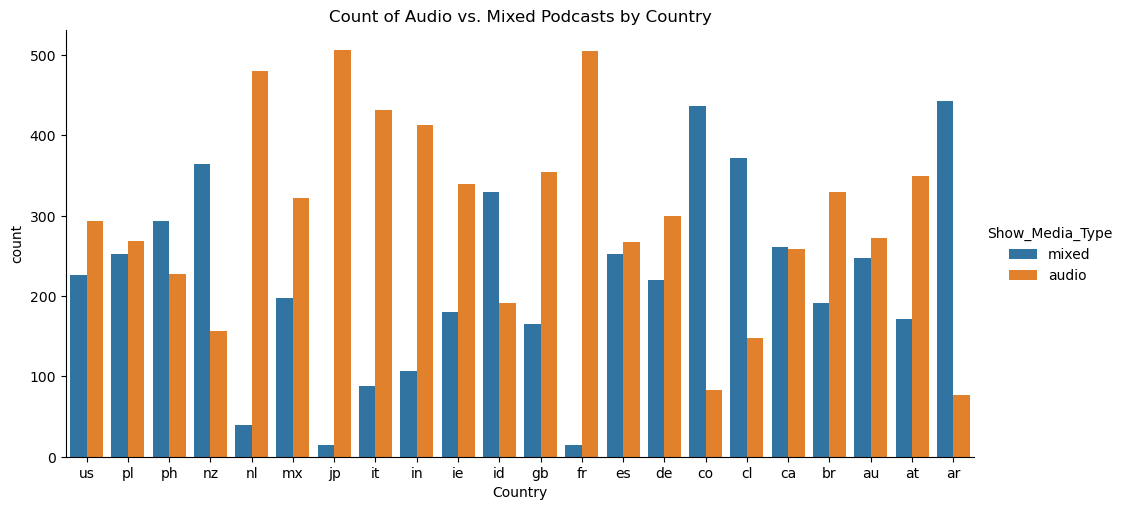

In [47]:
# Step 3: Visualize the count of mixed vs. audio podcasts
# in the Top 10 rankings on a country-by-country basis using a side-by-side bar chart
# Hue shows mixed (blue) and audio (orange)
# and kind='count' to count the number of occurences of each categorial value (mixed vs. audio)
sns.catplot(x='Country', hue='Show_Media_Type', data=top_10_df, kind='count', aspect=2)
# Set the title
plt.title('Count of Audio vs. Mixed Podcasts by Country')
plt.show()

##### Step 4: Calculate the percentage of mixed shows on a country-by-country basis

In [49]:
# Step 4: Calculate the percentage of mixed shows on a country-by country basis
# Filter the DataFrame for mixed podcasts
mixed_podcasts = top_10_df[top_10_df['Show_Media_Type']== 'mixed']
mixed_podcasts.head()

# Count the mixed podcasts by country
mixed_by_country = mixed_podcasts.groupby('Country')['Country'].size()
mixed_by_country.head()

# Get the total count by country
total_by_country = top_10_df.groupby('Country')['Country'].size()
total_by_country.head()

# Calculate the percentage of mixed podcasts per country
# Display from lowest to highest
# and round to 2 decimal places to improve readability
mixed_percentage_by_country = (mixed_by_country / total_by_country ) * 100
round(mixed_percentage_by_country.sort_values(),2)

,Date,Rank,Country,Rank_Change,Episode_Name,Episode_Description,Podcast_Name,Podcast_Description,Podcast_Publisher,Is_Explicit,Language,Release_Date,Show_HTML_Description,Show_Media_Type,Total_Episodes,Episode_Duration_Minutes
0,2024-09-02,1,us,UNCHANGED,#2197 - Mike Baker,Mike Baker is a former CIA covert operations o...,The Joe Rogan Experience,The official podcast of comedian Joe Rogan.,Joe Rogan,True,['en'],2024-08-29,<p>The official podcast of comedian Joe Rogan....,mixed,2366,164
1,2024-09-02,2,us,UNCHANGED,#2195 - Andrew Huberman,"Andrew Huberman, PhD, is a neuroscientist and ...",The Joe Rogan Experience,The official podcast of comedian Joe Rogan.,Joe Rogan,True,['en'],2024-08-27,<p>The official podcast of comedian Joe Rogan....,mixed,2366,187
2,2024-09-02,3,us,UNCHANGED,#2196 - Greg Fitzsimmons,"Greg Fitzsimmons is a comedian, actor, and wri...",The Joe Rogan Experience,The official podcast of comedian Joe Rogan.,Joe Rogan,True,['en'],2024-08-28,<p>The official podcast of comedian Joe Rogan....,mixed,2366,180
3,2024-09-02,4,us,UP,The Worst Creature To Run Into During The Ice Age,The Ice Age was no doubt one of earth’s most q...,ExtinctZoo,"Your one stop shop for all things dinosaurs, p...",ExtinctZoo,False,['en'],2024-08-31,"Your one stop shop for all things dinosaurs, p...",mixed,30,17
5,2024-09-02,6,us,UP,The Most Unhinged MYSTERY TECH,Today on Mystery Tech we look at items ranging...,Austin Evans,Austin Evans is a tech creator who has been cr...,Austin Evans,False,['en-US'],2024-08-25,Austin Evans is a tech creator who has been cr...,mixed,10,18


Country
ar    443
at    171
au    248
br    191
ca    261
Name: Country, dtype: int64

Country
ar    520
at    520
au    520
br    520
ca    520
Name: Country, dtype: int64

Country
jp     2.69
fr     2.88
nl     7.69
it    16.92
in    20.58
gb    31.73
at    32.88
ie    34.62
br    36.73
mx    38.08
de    42.31
us    43.46
au    47.69
pl    48.46
es    48.65
ca    50.19
ph    56.35
id    63.27
nz    70.00
cl    71.54
co    84.04
ar    85.19
Name: Country, dtype: float64

##### Step 5: Visualize the percentage of mixed podcasts on a country-by-country basis

Text(0.5, 28.999999999999986, 'Country')

Text(9.916358024691357, 0.5, 'Percentage of Mixed Podcasts')

Text(0.5, 1.0, 'Percentage of Mixed Podcasts by Country')

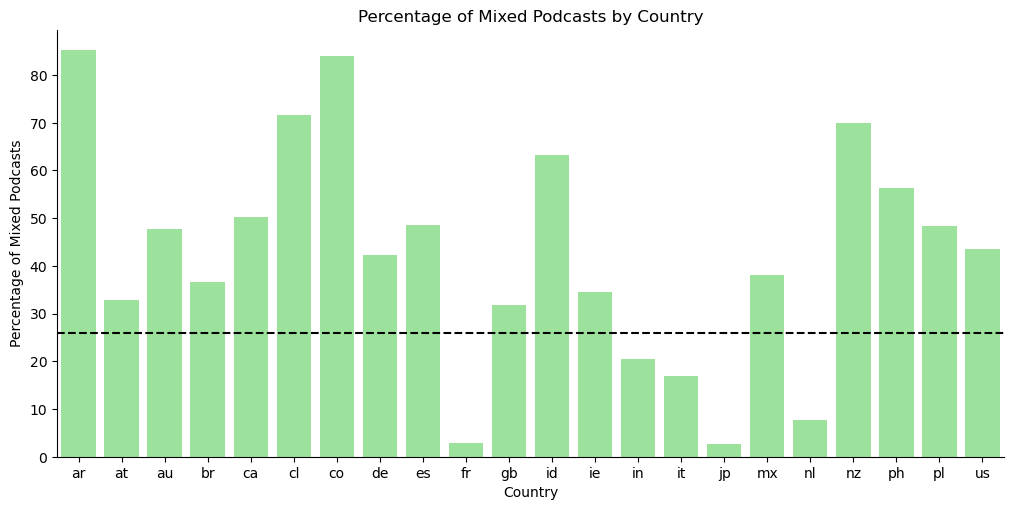

In [51]:
# Step 5: Visualize the percentage of mixed podcasts by country
# Create the catplot to show the percentage of mixed podcasts by country
sns.catplot(x=mixed_percentage_by_country.index, y=mixed_percentage_by_country.values, kind='bar', color='lightgreen', aspect=2)
# Add a reference line at 26% to mark the global threshold
plt.axhline(y=26, color='black', linestyle='--', label='26% Mixed Podcasts')
# Set x-axis label
plt.xlabel('Country')
# Set y-axis label
plt.ylabel('Percentage of Mixed Podcasts')
# Set title of the plot
plt.title('Percentage of Mixed Podcasts by Country')
plt.show()

### Key Managerial Takeaways

Podcasts in countries that clearly surpass the 26% global threshold are strong canidates for investment in video content. Secondary observation: In countries like France and Japan where there is currently a very low percentage of video podcasts, there is an untapped opportunity to grow into this space.

## No Shortcuts to the Top: Predicting Spotify Top 50 Staying Power with Machine Learning

In [43]:
# Already came up with a granular insight about the impact of video on the rankings
# Now let's use machine learning and scikit-learn to explore which features (variables) have the biggest
# impact on whether an episode stays in the Spotify Top 50
# As for a managerial takeaway, it logically follows that the top shows will have the best chance of
# capturing that aforementioned $ 5 billion of ad spending

##### Step 1: Import scikit-learn

In [74]:
import sklearn as sk

##### Step 2: Create a new DataFrame, and then clean up and prepare the data set

In [76]:
 # Start by creating a new DataFrame
 pods_df = df.copy()
 pods_df.head()

,Date,Rank,Country,Rank_Change,Episode_Name,Episode_Description,Podcast_Name,Podcast_Description,Podcast_Publisher,Is_Explicit,Language,Release_Date,Show_HTML_Description,Show_Media_Type,Total_Episodes,Episode_Duration_Minutes
0,2024-09-02,1,us,UNCHANGED,#2197 - Mike Baker,Mike Baker is a former CIA covert operations o...,The Joe Rogan Experience,The official podcast of comedian Joe Rogan.,Joe Rogan,True,['en'],2024-08-29,<p>The official podcast of comedian Joe Rogan....,mixed,2366,164
1,2024-09-02,2,us,UNCHANGED,#2195 - Andrew Huberman,"Andrew Huberman, PhD, is a neuroscientist and ...",The Joe Rogan Experience,The official podcast of comedian Joe Rogan.,Joe Rogan,True,['en'],2024-08-27,<p>The official podcast of comedian Joe Rogan....,mixed,2366,187
2,2024-09-02,3,us,UNCHANGED,#2196 - Greg Fitzsimmons,"Greg Fitzsimmons is a comedian, actor, and wri...",The Joe Rogan Experience,The official podcast of comedian Joe Rogan.,Joe Rogan,True,['en'],2024-08-28,<p>The official podcast of comedian Joe Rogan....,mixed,2366,180
3,2024-09-02,4,us,UP,The Worst Creature To Run Into During The Ice Age,The Ice Age was no doubt one of earth’s most q...,ExtinctZoo,"Your one stop shop for all things dinosaurs, p...",ExtinctZoo,False,['en'],2024-08-31,"Your one stop shop for all things dinosaurs, p...",mixed,30,17
4,2024-09-02,5,us,DOWN,"Jeffrey Sachs: Trump’s Plan to Stop WWIII, CIA...",Professor Jeffrey Sachs’s provides a full and ...,The Tucker Carlson Show,The Tucker Carlson Show is your beacon of free...,Tucker Carlson Network,False,['en'],2024-08-30,<p>The Tucker Carlson Show is your beacon of f...,audio,115,148


In [77]:
# Let's focus on the Top 50
# Write the lambda function
# For reference: 1 = top_50, 0 = not
pods_df['top_50'] = pods_df['Rank'].apply(lambda x: 1 if x <=50 else 0)
pods_df.head()

,Date,Rank,Country,Rank_Change,Episode_Name,Episode_Description,Podcast_Name,Podcast_Description,Podcast_Publisher,Is_Explicit,Language,Release_Date,Show_HTML_Description,Show_Media_Type,Total_Episodes,Episode_Duration_Minutes,top_50
0,2024-09-02,1,us,UNCHANGED,#2197 - Mike Baker,Mike Baker is a former CIA covert operations o...,The Joe Rogan Experience,The official podcast of comedian Joe Rogan.,Joe Rogan,True,['en'],2024-08-29,<p>The official podcast of comedian Joe Rogan....,mixed,2366,164,1
1,2024-09-02,2,us,UNCHANGED,#2195 - Andrew Huberman,"Andrew Huberman, PhD, is a neuroscientist and ...",The Joe Rogan Experience,The official podcast of comedian Joe Rogan.,Joe Rogan,True,['en'],2024-08-27,<p>The official podcast of comedian Joe Rogan....,mixed,2366,187,1
2,2024-09-02,3,us,UNCHANGED,#2196 - Greg Fitzsimmons,"Greg Fitzsimmons is a comedian, actor, and wri...",The Joe Rogan Experience,The official podcast of comedian Joe Rogan.,Joe Rogan,True,['en'],2024-08-28,<p>The official podcast of comedian Joe Rogan....,mixed,2366,180,1
3,2024-09-02,4,us,UP,The Worst Creature To Run Into During The Ice Age,The Ice Age was no doubt one of earth’s most q...,ExtinctZoo,"Your one stop shop for all things dinosaurs, p...",ExtinctZoo,False,['en'],2024-08-31,"Your one stop shop for all things dinosaurs, p...",mixed,30,17,1
4,2024-09-02,5,us,DOWN,"Jeffrey Sachs: Trump’s Plan to Stop WWIII, CIA...",Professor Jeffrey Sachs’s provides a full and ...,The Tucker Carlson Show,The Tucker Carlson Show is your beacon of free...,Tucker Carlson Network,False,['en'],2024-08-30,<p>The Tucker Carlson Show is your beacon of f...,audio,115,148,1


In [78]:
# Now let's trim all the unneeded columns
# Want a steamlined model that will only focus on features likely to impact ranking
columns_to_drop = [
    'Country',
    'Date',
    'Episode_Name',
    'Episode_Description',
    'Podcast_Name',
    'Podcast_Description',
    'Podcast_Publisher',
    'Language',
    'Rank',
    'Rank_Change',
    'Release_Date',
    'Show_HTML_Description'
]
pods_df.drop(columns=columns_to_drop, inplace=True)

In [79]:
# Check the updated DataFrame
pods_df.head()

,Is_Explicit,Show_Media_Type,Total_Episodes,Episode_Duration_Minutes,top_50
0,True,mixed,2366,164,1
1,True,mixed,2366,187,1
2,True,mixed,2366,180,1
3,False,mixed,30,17,1
4,False,audio,115,148,1


In [80]:
# Use .shape to see that there are just five columns now
pods_df.shape

(228800, 5)

In [81]:
# Now get dummies to turn are key categorical varibles into 1's and 0's
pods_df = pd.get_dummies(pods_df, columns=['Is_Explicit', 'Show_Media_Type'],dtype=float)
pods_df

,Total_Episodes,Episode_Duration_Minutes,top_50,Is_Explicit_False,Is_Explicit_True,Show_Media_Type_audio,Show_Media_Type_mixed
0,2366,164,1,0.0,1.0,0.0,1.0
1,2366,187,1,0.0,1.0,0.0,1.0
2,2366,180,1,0.0,1.0,0.0,1.0
3,30,17,1,1.0,0.0,0.0,1.0
4,115,148,1,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
228795,1760,57,0,1.0,0.0,1.0,0.0
228796,487,46,0,1.0,0.0,0.0,1.0
228797,274,41,0,1.0,0.0,0.0,1.0
228798,228,49,0,1.0,0.0,1.0,0.0


In [82]:
# Notice above that get dummies gave us two versions of each variable for 'Is_Explicit' and 'Show_Media_Type'
# Check .corr() to see the issue:
pods_df.corr()

,Total_Episodes,Episode_Duration_Minutes,top_50,Is_Explicit_False,Is_Explicit_True,Show_Media_Type_audio,Show_Media_Type_mixed
Total_Episodes,1.000000,0.024419,0.038027,-0.056908,0.056908,0.009521,-0.009521
Episode_Duration_Minutes,0.024419,1.000000,0.041261,-0.138460,0.138460,-0.142970,0.142970
top_50,0.038027,0.041261,1.000000,-0.034017,0.034017,-0.091161,0.091161
Is_Explicit_False,-0.056908,-0.138460,-0.034017,1.000000,-1.000000,0.045663,-0.045663
Is_Explicit_True,0.056908,0.138460,0.034017,-1.000000,1.000000,-0.045663,0.045663
Show_Media_Type_audio,0.009521,-0.142970,-0.091161,0.045663,-0.045663,1.000000,-1.000000
Show_Media_Type_mixed,-0.009521,0.142970,0.091161,-0.045663,0.045663,-1.000000,1.000000


In [83]:
# Need to drop one of each of the duplicate columns
columns_to_drop = ['Is_Explicit_False', 'Show_Media_Type_audio']
pods_df.drop(columns=columns_to_drop, inplace=True)

In [84]:
# Check the update
pods_df.head()

,Total_Episodes,Episode_Duration_Minutes,top_50,Is_Explicit_True,Show_Media_Type_mixed
0,2366,164,1,1.0,1.0
1,2366,187,1,1.0,1.0
2,2366,180,1,1.0,1.0
3,30,17,1,0.0,1.0
4,115,148,1,0.0,0.0


##### Step 3: Set X and Y

In [86]:
# Set X and remove the outcome, or target variable, 'top_50'
X = pods_df.drop(['top_50'],axis=1)

In [87]:
# Set 'top_50' as Y, the target variable
Y = pods_df.top_50

##### Step 4: Split the Training and Test Set

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
# Split the data into 70% training set and 30% testing set
train_test_split(X,Y,test_size=30,random_state = 0)

[        Total_Episodes  Episode_Duration_Minutes  Is_Explicit_True  \
 148358             274                        45               0.0   
 39042              883                        47               0.0   
 82677              270                        52               0.0   
 202108             385                        56               0.0   
 77016              256                        65               1.0   
 ...                ...                       ...               ...   
 176963              25                        50               0.0   
 117952             272                        77               0.0   
 173685              27                        20               1.0   
 43567              186                        70               0.0   
 199340             120                        57               1.0   
 
         Show_Media_Type_mixed  
 148358                    0.0  
 39042                     0.0  
 82677                     0.0  
 202108       

In [91]:
# Save X_train, X_test, Y_train, Y_test for future use
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state = 0)

In [92]:
# Check the number of observations in the whole dataset
len(X)

228800

In [93]:
# Check the number of observations in the training set
len(X_train)

160160

In [94]:
# Confirm the training set is 70% of the total data set
len(X_train)/len(X)

0.7

In [95]:
# Check the number of observations in the testing set
len(X_test)

68640

In [96]:
# Confirm that the testing set is 30% of the total dataset
len(X_test)/len(X)

0.3

In [97]:
# Confirm that the total length of X_train and X_test equals the length of X
(len(X_train) + len(X_test)) == len(X)

True

In [98]:
# Check the first 5 rows of the training set, X_train
X_train.head()

,Total_Episodes,Episode_Duration_Minutes,Is_Explicit_True,Show_Media_Type_mixed
101956,367,14,0.0,0.0
128055,324,57,0.0,0.0
3703,64,73,0.0,1.0
174277,643,53,0.0,0.0
33232,85,69,0.0,0.0


##### Step 5: Train on the training set

In [100]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [101]:
# Initialize the model and train it on the X_train and Y_train data sets
cl = RandomForestClassifier(random_state = 0)

cl.fit(X_train,Y_train)

RandomForestClassifier(random_state=0)

##### Step 6: Predict on the test set

In [103]:
# Predict on the testing set (X_test) using the trained model
cl.predict(X_test)

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [104]:
# Display the values of the Y_test, or target variable
Y_test

202691    0
204807    1
36264     0
189892    0
6726      0
         ..
193903    0
222110    0
146089    0
180832    1
104309    0
Name: top_50, Length: 68640, dtype: int64

In [105]:
# Calculate the accuracy of the model by comparing predicted values
# to the actual vaules of Y_test
(cl.predict(X_test) == Y_test).mean()

0.8030448717948718

In [106]:
# Store the predicted values in 'y_pred'
y_pred = cl.predict(X_test)

In [107]:
# Check the predicted values in 'y_pred'
y_pred

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [108]:
# Get prediction outputs with probabilities of 0 and 1 using predict_proba
cl.predict_proba(X_test)

array([[1.        , 0.        ],
       [0.03      , 0.97      ],
       [0.4148189 , 0.5851811 ],
       ...,
       [0.46075981, 0.53924019],
       [0.97716667, 0.02283333],
       [0.75478571, 0.24521429]])

In [109]:
# Get prediction outputs with probabilities of 1 only
# Note: [:,1] is to skip the first value since the focus is on the second one
y_pred_proba = cl.predict_proba(X_test)[:,1]

In [110]:
# Check the values for 1's in 'y_pred_proba'
y_pred_proba

array([0.        , 0.97      , 0.5851811 , ..., 0.53924019, 0.02283333,
       0.24521429])

##### Step 7: Check the performance of the model

##### Confusion Matrix

In [113]:
# Import the confusion matrix
from sklearn.metrics import confusion_matrix

In [114]:
# Import the metrics module
import sklearn.metrics as met

In [115]:
# Get the confusion matrix using confusion_matrix
confusion_matrix(Y_test,y_pred)

array([[45991,  5478],
       [ 8041,  9130]], dtype=int64)

Reviewing the Confusion Matrix:
- **True Positives:** Correctly predicted that 45,991 podcasts stayed in the Top 50
- **False Positives:** Incorrectly predicted that 5,478 podasts would stay in the Top 50
- **False Negatives:** Incorrectly predicted that 8,041 podcasts would drop out of the Top 50
- **True Negatives:** Correctlty predicted that 9,130 podcasts dropped out of the Top 50

##### Accuracy

In [118]:
# Calculate the accuracy by comparing predicted values (y_pred)
# to actual vaules (Y_test)
(y_pred == Y_test).mean()

0.8030448717948718

In [119]:
# Now use the .accuracy_score() function to get the Accuracy
met.accuracy_score(Y_test, y_pred)

0.8030448717948718

##### Precision

In [121]:
# Get Precision using .precision_score()
# Note: This shows how many of the retrieved elements were actually positive
met.precision_score(Y_test,y_pred)

0.625

In [122]:
# Check how often 1s show up in the test data set, or Y_test
Y_test.mean()

0.2501602564102564

##### Recall

In [124]:
# Get Recall using .recall_score()
# This measures how good the model is at predicting all the podcasts that stayed in the Top 50
met.recall_score(Y_test,y_pred)

0.5317104420243434

##### AUC Score

In [126]:
# Get AUC score using .roc_auc_score()
# This measures how well the model can distinguish between positive and negative cases
# A very helpful measure for imbalanced data sets where the model might struggle
# with predicting the minority class
met.roc_auc_score(Y_test,y_pred_proba)

0.8380849224135359

##### Step 8: Explore Feature Importance with the [scikit-learn documentation](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html)

In [128]:
# Let's quickly check the feature importance, or how important each feature is
# to the model's prediction

# Create a DataFrame for feature importance of the
# Random Forest Classifier
feature_importance = pd.DataFrame({
    'Feature': X_train.columns, # Get the names of the columns
    'Importance': cl.feature_importances_ # Use the built-in attribute to get the score for how important each feature is
})

# Use .sort_values() to sort the features by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

feature_importance

,Feature,Importance
0,Total_Episodes,0.634871
1,Episode_Duration_Minutes,0.342805
3,Show_Media_Type_mixed,0.014285
2,Is_Explicit_True,0.008038


##### Step 9: Visualize Feature Importance within the model

Text(0.5, 1.0, 'Feature Importance in the Spotify Top 50 Random Forest Classifer Model')

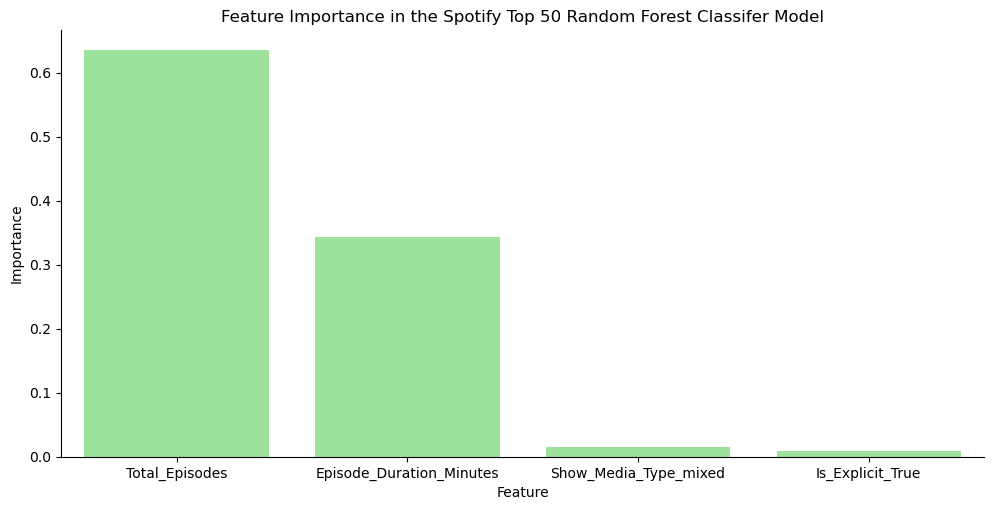

In [130]:
# Create a catplot to show Feature Importance by feature, or variable
sns.catplot(x='Feature', y='Importance', kind='bar', color='lightgreen', aspect=2, data=feature_importance)
plt.title('Feature Importance in the Spotify Top 50 Random Forest Classifer Model')

### Key Managerial Takeaway

As the above graph underscores, by far the most important feature in terms of staying the Top 50 is Total_Episodes. There are no shortcuts to the top. Successful shows build a quality library, a strong brand and a loyal auidence.